# Проект: Определение наиболее выгодного региона нефтедобычи

## Данные

Данные геологоразведки трёх регионов находятся в файлах:  
/datasets/geo_data_0.csv  
/datasets/geo_data_1.csv  
/datasets/geo_data_2.csv  
  
- id — уникальный идентификатор скважины
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы)
- product — объём запасов в скважине (тыс. баррелей)

## Задача

На основе данных геологи разведки выбрать район добычи нефти.

## Используемые библиотеки

pandas, matplotlib, sklearn, scipy, os

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats as st

In [88]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
print(data_0.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [89]:
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
print(data_1.head())

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


In [90]:
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
print(data_2.head())

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [91]:
print(data_0.dtypes) # Типы признаков 

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [92]:
print(data_1.dtypes) # Типы признаков 

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [93]:
print(data_2.dtypes) # Типы признаков 

id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object


In [94]:
data_0.isna().sum() # Поиск и подсчет пропусков

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [95]:
data_1.isna().sum() # Поиск и подсчет пропусков

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [96]:
data_2.isna().sum() # Поиск и подсчет пропусков

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [97]:
data_0.duplicated().sum() # Поиск и подсчет явных дубликатов

0

In [98]:
data_1.duplicated().sum() # Поиск и подсчет явных дубликатов

0

In [99]:
data_2.duplicated().sum() # Поиск и подсчет явных дубликатов

0

<AxesSubplot:>

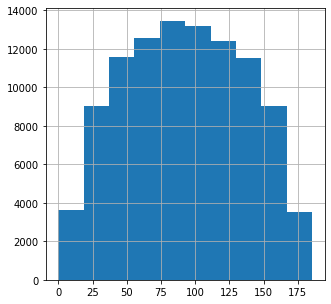

In [100]:
data_0['product'].hist(figsize=(5, 5)) # Проверка наличия неадекватных значений

<AxesSubplot:>

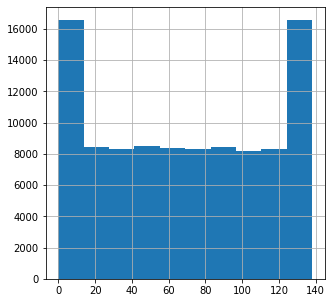

In [101]:
data_1['product'].hist(figsize=(5, 5)) # Проверка наличия неадекватных значений

<AxesSubplot:>

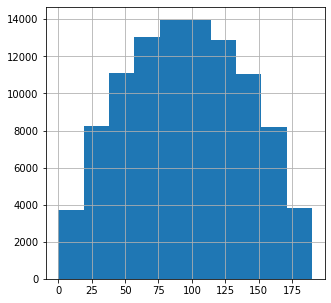

In [102]:
data_2['product'].hist(figsize=(5, 5)) # Проверка наличия неадекватных значений

In [103]:
data_0.corr() # Проверка на мультиколлинеарность

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [104]:
data_1.corr() # Проверка на мультиколлинеарность

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [105]:
data_2.corr() # Проверка на мультиколлинеарность

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


## Обучение и проверка модели

In [106]:
def spliter(features, target, data): # Функция для разделения данных на выборки
    features = data.drop(['product', 'id'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345) 
    return features_train, features_valid, target_train, target_valid

features_train_0, features_valid_0, target_train_0, target_valid_0 = spliter(features_0, target_0, data_0)
features_train_1, features_valid_1, target_train_1, target_valid_1 = spliter(features_1, target_1, data_1)
features_train_2, features_valid_2, target_train_2, target_valid_2 = spliter(features_2, target_2, data_2)

In [108]:
def modeling(features_train, target_train, features_valid, target_valid, number_data):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid) 
    correct_answer_valid = target_valid
    mse = mean_squared_error(target_valid, predictions_valid)
    print('Средний запас (тыс. барр) предсказанного сырья для региона {}:'.format(number_data), predictions_valid.mean())
    print('Суммарный запас (тыс. барр) предсказанного сырья для региона 0:', predictions_valid.sum())
    print("RMSE =", mse ** 0.5)
    return

In [109]:
modeling(features_train_0, target_train_0, features_valid_0, target_valid_0, 0)

Средний запас (тыс. барр) предсказанного сырья для региона 0: 92.59256778438035
Суммарный запас (тыс. барр) предсказанного сырья для региона 0: 2314814.194609509
RMSE = 37.5794217150813


In [110]:
modeling(features_train_1, target_train_1, features_valid_1, target_valid_1, 1)

Средний запас (тыс. барр) предсказанного сырья для региона 1: 68.728546895446
Суммарный запас (тыс. барр) предсказанного сырья для региона 0: 1718213.67238615
RMSE = 0.893099286775617


In [111]:
modeling(features_train_2, target_train_2, features_valid_2, target_valid_2, 2)

Средний запас (тыс. барр) предсказанного сырья для региона 2: 94.96504596800489
Суммарный запас (тыс. барр) предсказанного сырья для региона 0: 2374126.1492001223
RMSE = 40.02970873393434


Модель для региона 1 показывает наименьший средний запас сырья и при этом наименьшее значение среднеквадратичной ошибки RMSE, что может быть связано с линейной зависимость product от f2 (коэфф. корр. 0.999397). Модель предсказывает более точно, так как данные более предсказуемы для региона 1.

## Подготовка к расчёту прибыли

In [112]:
BUDGET = 10000 # бюджет в млн рублей
POINTS_PER_BUDGET = 200 # количество разрабатываемых точек
PRODUCT_PRICE = 0.45 # доходность одной тыс. единицы барреля в млн рублей
min_volume = BUDGET/PRODUCT_PRICE
print('min необходимый обьем запасов в скважинах региона в тыс. баррель:', min_volume)
print('min средний обьем запасов в скважине в тыс. баррель:', min_volume/200)

min необходимый обьем запасов в скважинах региона в тыс. баррель: 22222.222222222223
min средний обьем запасов в скважине в тыс. баррель: 111.11111111111111


В среднем каждая скважина дает предсказанный обьем нефти меньший необходимого для разработки. Но если учесть, что в каждом регионе будут выбраны 200 случайных скважин, то можно считать, что 0 и 2 регион являются потенциально прибыльными. 

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

In [113]:
def is_profitable(predictions, targets): #  Функция расчета прибыли
    best_predictions = pd.Series(predictions).sort_values(ascending=False).head(POINTS_PER_BUDGET)
    best_point = targets.iloc[best_predictions.index]
    profit = (PRODUCT_PRICE * best_point.sum()) - BUDGET
    return profit


<div class="alert alert-block alert-success">
<b>Успех:</b> Верно.
</div>

## Расчёт прибыли и рисков 

In [114]:
def profit_calculation(predictions_valid, correct_answer_valid, number_data):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        subsample = pd.Series(predictions_valid).sample(n=500, random_state=state, replace=True)
        values.append(is_profitable(subsample, correct_answer_valid))
    
    values = pd.Series(values)

    print('Средняя прибыль (млн. р.) от 200 скважин в регионе {}:'.format(number_data), values.mean())

    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print("95%-ый доверительный интервал:", 'от', lower, 'до', upper)

    risk = len(values[values < 0]) / len(values)
    print('Процент риска {:.2%}'.format(risk))
    return
    

In [115]:
profit_calculation(predictions_valid_0, correct_answer_valid_0, 0)

Средняя прибыль (млн. р.) от 200 скважин в регионе 0: 396.16498480237146
95%-ый доверительный интервал: от -111.21554589049533 до 909.7669415534222
Процент риска 6.90%


In [116]:
profit_calculation(predictions_valid_1, correct_answer_valid_1, 1)

Средняя прибыль (млн. р.) от 200 скважин в регионе 1: 456.04510578666105
95%-ый доверительный интервал: от 33.82050939898541 до 852.2894538660361
Процент риска 1.50%


In [117]:
profit_calculation(predictions_valid_2, correct_answer_valid_2, 2)

Средняя прибыль (млн. р.) от 200 скважин в регионе 2: 404.4038665683571
95%-ый доверительный интервал: от -163.35041339560078 до 950.3595749238001
Процент риска 7.60%


**Выводы:** Построили модель линейной регрессии для определения региона, где добыча приносит наибольшую прибыль. Проанализировали возможную прибыль техникой Bootstrap. Наиболее прибыльным оказался регион 1. При этом риски минимальны и равны 1.20%. Таким образом, разработку новых скважин следует проводить в регион 1.